## Clustering

### learning objectives

- explain difference between supervised and unsupervised learning
- apply k-means clustering algorithm to practical problem
- choose the best number of clusters, k using appropriate metrics

### Test Your Knowledge: Supervised & Unsupervised Learning?

In machine learning, there are two basic approaches: `supervised learning` and `unsupervised learning`. The main difference is one uses labeled data to help predict outcomes, while the other does not.

Choose either `supervised` or `unsupervised` for the below learning tasks -

- a) classify pets into dogs and cats based on labels
- b) predict the price of a house based on features such as square footage and number of bedrooms
- c) perform EDA on dataset hoping to uncover underlying groupings within data 

### Clustering objective

The goal of clustering is to divide the data into `distinct subgroups` such that observations within each group are similar to each other.

**common reasons for clustering:**

- to find distinct subpopulations in the data, and perhaps label them
- to segment the data (for some outside purpose, either business or scientific) using a principled approach




#### Human Development Index (HDI) Country Clustering

The HDI was created to emphasize the people and their capabilities as a criteria for assessing the development of a country, not economic growth alone. The HDI can also be used to question national policy choices, asking how two countries with the same level of gross national income (GNI) per capita can end up with different human development outcomes. These contrasts can stimulate debate about government policy priorities.
The Human Development Index (HDI) is a summary measure of average achievement in key dimensions of human development: a long and healthy life, being knowledgeable and have a decent standard of living. The HDI is the geometric mean of normalized indices for each of the three dimensions, namely, `life expectancy`, `education` and `GNI`.

In this notebook we will go through the process of using **unsupervised learning algorithm: clustering**, to group similar data.

image.png

Source: 1. https://hdr.undp.org/en/data, 2. https://hdr.undp.org/en/composite/HDI


### Dataset Information

#### As given in the HDI data [document](./hdi_data.pdf),  Countries are divided by their HDI Rank into 4 categories: 
* Very high human development
* High human development
* Medium human development
* Low human development

We will try to create 4 clusters from the given dataset and check if it closely matches to data in the HDI data document.


### Importing Python and Machine Learning Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

### Loading Data

In [2]:
df = pd.read_csv("hdi_data.csv")

In [3]:
# clean data (dropping redundant columns from the dataframe)
df = df.drop("Unnamed: 0", axis=1)
df.head(3)

Country  Life expectancy at birth  \
0                   Singapore                      83.6   
1             Solomon Islands                      73.0   
2  Iran (Islamic Republic of)                      76.7   

   Expected years of schooling  Mean years of schooling    gni  \
0                         16.4                     11.6  90919   
1                         10.2                      5.7   2482   
2                         14.8                     10.3  13001   

  HDI classification  
0          very high  
1             medium  
2               high

In the case of our time-based features in units of years, do we need to normalize/standardize the data?

In [4]:
# from sklearn.preprocessing import StandardScaler

# scaled_features = StandardScaler().fit_transform(df_features)

### Calculate basic statistics about the data using the functions given by Pandas

In [5]:
df.describe().T

count          mean           std    min  \
Life expectancy at birth     187.0     72.629947      7.371776   53.3   
Expected years of schooling  187.0     13.293583      2.936782    5.0   
Mean years of schooling      187.0      8.705348      3.083423    1.6   
gni                          187.0  19842.812834  21619.289857  732.0   

                                 25%      50%      75%       max  
Life expectancy at birth       67.35     73.9     77.9      84.9  
Expected years of schooling    11.40     13.1     15.2      22.0  
Mean years of schooling         6.35      9.0     11.3      14.2  
gni                          4557.00  12246.0  28084.0  146830.0

Although we only have a couple features, generally it can be insightful to use correlation plots to get an overview of patterns and relationships in the data

### Create a visualization for Correlation between the given features after dropping redundant columns from the dataframe

In [6]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);

We can see that the 4 features exhibit some high degree of correlation.

### Create a scatterplot using life expectancy and mean years of schooling for a given country. What does the plot suggest?

In [7]:
selected_feature1 = 'Life expectancy at birth'
selected_feature2 = 'Mean years of schooling'

<AxesSubplot:xlabel='Life expectancy at birth', ylabel='Mean years of schooling'>

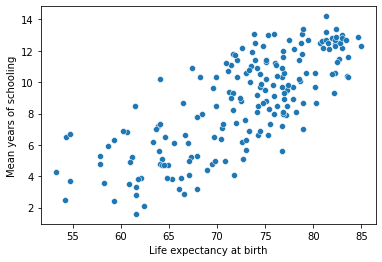

In [8]:
sns.scatterplot(data=df, x=selected_feature1, y=selected_feature2)

With it's positive trend, the scatterplot also shows that *mean years of schooling* and *life expancy at birth* are correlated

### Using the  features, we will create 4 clusters of countries. We will compare our results with classification done by UN in the [document](./hdi_data.pdf)

In [9]:
df

Country  Life expectancy at birth  \
0                     Singapore                      83.6   
1               Solomon Islands                      73.0   
2    Iran (Islamic Republic of)                      76.7   
3                      Mongolia                      69.9   
4                    Montenegro                      76.9   
..                          ...                       ...   
182                    Cambodia                      69.8   
183                      Bhutan                      71.8   
184      Hong Kong, China (SAR)                      84.9   
185              United Kingdom                      81.3   
186                     Austria                      81.5   

     Expected years of schooling  Mean years of schooling    gni  \
0                           16.4                     11.6  90919   
1                           10.2                      5.7   2482   
2                           14.8                     10.3  13001   
3                           14.2                     10.3  10588   
4                           15.0                     11.6  20839   
..                           ...                      ...    ...   
182                         11.5                      5.0   4079   
183                         13.0                      4.1   9438   
184                         16.9                     12.3  62607   
185                         17.5                     13.2  45225   
186                         16.1                     12.5  53619   

    HDI classification  
0            very high  
1               medium  
2                 high  
3                 high  
4            very high  
..                 ...  
182             medium  
183             medium  
184          very high  
185          very high  
186          very high  

[187 rows x 6 columns]

### preprocess data (scale features)

In [10]:
df_features=df[['Life expectancy at birth','Mean years of schooling','Expected years of schooling','gni']]

note we need to scale the features because we're working with different units of years and dollar amount

In [11]:
scaled_features = StandardScaler().fit_transform(df_features)

#### 1. Fit model to the data

In [12]:
num_clusters = 4
Kmean = KMeans(n_clusters=num_clusters)
Kmean.fit(scaled_features)

KMeans(n_clusters=4)

#### 2. Find coordinates of the cluster centers generated in the previous step

In [13]:
Kmean.cluster_centers_

array([[-1.4951103 , -1.4009156 , -1.31459395, -0.7809174 ],
       [ 0.30690193,  0.43792969,  0.26083045, -0.19659323],
       [ 1.13620007,  1.04737149,  1.16221574,  1.5436552 ],
       [-0.42300465, -0.68927407, -0.54896309, -0.61680769]])

#### 3. Print an array which will have index i as cluster number assigned to that particular country (i.e., row in the input data)

In [14]:
Kmean.labels_

array([2, 3, 1, 1, 1, 0, 2, 3, 1, 2, 1, 1, 2, 1, 1, 0, 1, 3, 2, 0, 1, 0,
       2, 2, 3, 0, 2, 3, 1, 1, 1, 1, 1, 3, 1, 2, 1, 2, 3, 2, 0, 1, 1, 2,
       3, 0, 1, 3, 1, 1, 1, 2, 3, 1, 0, 0, 0, 2, 1, 1, 3, 2, 1, 1, 1, 2,
       1, 3, 3, 0, 2, 0, 0, 1, 3, 2, 3, 0, 2, 0, 1, 1, 1, 0, 0, 1, 0, 3,
       3, 2, 1, 0, 1, 1, 1, 1, 0, 3, 1, 0, 2, 1, 0, 1, 1, 2, 0, 1, 1, 1,
       3, 0, 1, 0, 2, 3, 1, 3, 0, 0, 2, 1, 1, 3, 1, 0, 1, 1, 2, 1, 2, 3,
       3, 2, 1, 0, 3, 3, 3, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 0, 1, 2, 1, 1,
       3, 1, 0, 2, 1, 1, 2, 0, 3, 1, 3, 2, 3, 0, 0, 0, 0, 3, 1, 2, 3, 1,
       2, 1, 2, 0, 1, 1, 3, 3, 2, 2, 2], dtype=int32)

# What's the correct number of clusters?

### What if we weren't sure about the number of clusters, k and we wanted to investigate this further...

let's cluster the data above with k-means using various values of k. We'll compute metrics at the same time.

In [15]:
maxk = 13
wcss = []

for k in range(1,maxk):
    Kmean = KMeans(k)
    Kmean.fit(scaled_features)

    # compute the within-cluster sum of squares (WCSS)
    wcss.append(Kmean.inertia_) 

# The elbow method

We simply plot the within-cluster sum of squares and try to find the crook of the elbow, or a point of transition. Where do you see an elbow?

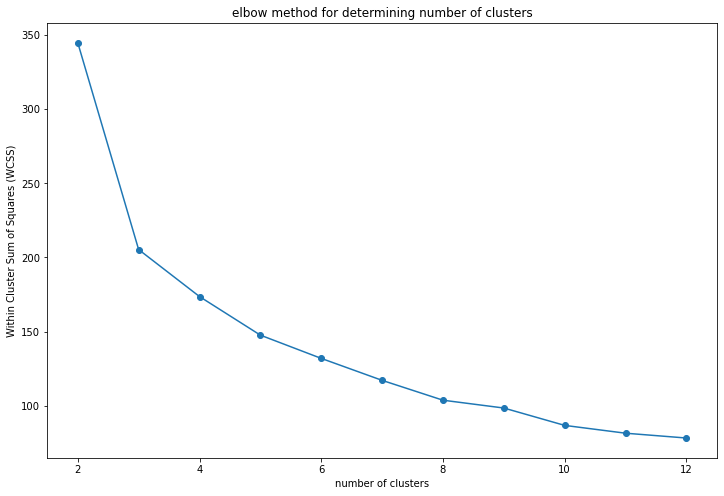

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(range(2,maxk), wcss[1:maxk], 'o-')

ax.set_title('elbow method for determining number of clusters')
ax.set_xlabel('number of clusters')
ax.set_ylabel('Within Cluster Sum of Squares (WCSS)');

The Within Cluster Sum of Squares (WCSS) decreases steadily with more clusters.  The optimal number of clusters, k is often not obvious looking at these elbow plots. k=4 seems reasonable, but it's hard to see "an elbow" 

# make new column for "cluster label" and assign cluster label value based on kmeans analysis

In [17]:
# let's just focus on num_clusters = 4 and redo our kmeans clustering
num_clusters = 4
Kmean = KMeans(n_clusters=num_clusters)
Kmean.fit(scaled_features)

# make new column for "cluster label" and assign cluster label value based on kmeans analysis

df.loc[Kmean.labels_==0,'predicted_cluster_label'] = 0
df.loc[Kmean.labels_==1,'predicted_cluster_label'] = 1
df.loc[Kmean.labels_==2,'predicted_cluster_label'] = 2
df.loc[Kmean.labels_==3,'predicted_cluster_label'] = 3
df

Country  Life expectancy at birth  \
0                     Singapore                      83.6   
1               Solomon Islands                      73.0   
2    Iran (Islamic Republic of)                      76.7   
3                      Mongolia                      69.9   
4                    Montenegro                      76.9   
..                          ...                       ...   
182                    Cambodia                      69.8   
183                      Bhutan                      71.8   
184      Hong Kong, China (SAR)                      84.9   
185              United Kingdom                      81.3   
186                     Austria                      81.5   

     Expected years of schooling  Mean years of schooling    gni  \
0                           16.4                     11.6  90919   
1                           10.2                      5.7   2482   
2                           14.8                     10.3  13001   
3                           14.2                     10.3  10588   
4                           15.0                     11.6  20839   
..                           ...                      ...    ...   
182                         11.5                      5.0   4079   
183                         13.0                      4.1   9438   
184                         16.9                     12.3  62607   
185                         17.5                     13.2  45225   
186                         16.1                     12.5  53619   

    HDI classification  predicted_cluster_label  
0            very high                      1.0  
1               medium                      0.0  
2                 high                      3.0  
3                 high                      3.0  
4            very high                      3.0  
..                 ...                      ...  
182             medium                      0.0  
183             medium                      0.0  
184          very high                      1.0  
185          very high                      1.0  
186          very high                      1.0  

[187 rows x 7 columns]

In [27]:
df[(df['HDI classification']=='very high')&(df.predicted_cluster_label==1)]

Country  Life expectancy at birth  \
0                 Singapore                      83.6   
6             Liechtenstein                      80.7   
9               Netherlands                      82.3   
12                   France                      82.7   
18                  Denmark                      80.9   
22                   Canada                      82.4   
23                   Cyprus                      81.0   
26      Korea (Republic of)                      83.0   
35              New Zealand                      82.3   
37                   Israel                      83.0   
39                  Germany                      81.3   
43                 Portugal                      82.1   
51                   Latvia                      75.3   
57                   Sweden                      82.8   
61                    Japan                      84.6   
65                  Bahrain                      77.3   
70                  Finland                      81.9   
75                  Czechia                      79.4   
78                    Italy                      83.5   
89        Brunei Darussalam                      75.9   
100                  Greece                      82.2   
105                   Qatar                      80.2   
114                   Malta                      82.5   
120                 Estonia                      78.8   
128               Lithuania                      75.9   
130                  Poland                      78.7   
133                Slovenia                      81.3   
140                 Ireland                      82.3   
142            Saudi Arabia                      75.1   
143                 Andorra                      81.9   
145                 Iceland                      83.0   
146    United Arab Emirates                      78.0   
151                 Belgium                      81.6   
157              Luxembourg                      82.3   
160                  Norway                      82.4   
165           United States                      78.9   
173               Australia                      83.4   
176                   Spain                      83.6   
178                  Kuwait                      75.5   
184  Hong Kong, China (SAR)                      84.9   
185          United Kingdom                      81.3   
186                 Austria                      81.5   

     Expected years of schooling  Mean years of schooling     gni  \
0                           16.4                     11.6   90919   
6                           14.9                     12.5  146830   
9                           18.5                     12.4   55979   
12                          15.6                     11.5   45937   
18                          18.9                     12.6   60365   
22                          16.2                     13.4   46808   
23                          15.2                     12.2   38188   
26                          16.5                     12.2   44501   
35                          18.8                     12.8   44057   
37                          16.2                     13.0   41524   
39                          17.0                     14.2   54534   
43                          16.5                      9.3   33155   
51                          16.2                     13.0   32803   
57                          19.5                     12.5   54489   
61                          15.2                     12.9   42274   
65                          16.3                      9.5   39497   
70                          19.4                     12.8   49452   
75                          16.8                     12.7   38745   
78                          16.1                     10.4   42840   
89                          14.3                      9.1   64490   
100                         17.9                     10.6   29002   
105                         12.0                  

In [28]:
df[(df['HDI classification']=='high')&(df.predicted_cluster_label==3)]

Country  Life expectancy at birth  \
2          Iran (Islamic Republic of)                      76.7   
3                            Mongolia                      69.9   
8                         Saint Lucia                      76.2   
10                            Armenia                      75.1   
13                            Albania                      78.6   
16                 Dominican Republic                      74.1   
20                       South Africa                      64.1   
28                Palestine, State of                      74.1   
30                              Palau                      73.9   
36                             Mexico                      75.1   
41                           Viet Nam                      75.4   
46   Saint Vincent and the Grenadines                      72.5   
50                            Jamaica                      74.5   
62                         Azerbaijan                      73.0   
81                          Sri Lanka                      77.0   
82                           Colombia                      77.3   
90                               Cuba                      78.8   
92                               Peru                      76.7   
94                            Algeria                      76.9   
98                              Samoa                      73.3   
103                           Lebanon                      78.9   
104                             China                      76.9   
107                         Indonesia                      71.7   
108                             Tonga                      70.9   
112                           Tunisia                      76.7   
116                           Ecuador                      77.0   
121                            Brazil                      75.9   
126                   North Macedonia                      75.8   
127            Bosnia and Herzegovina                      77.4   
129                           Grenada                      72.4   
139                          Dominica                      78.2   
144                        Uzbekistan                      71.7   
147                          Suriname                      71.7   
148                              Fiji                      67.4   
150                          Paraguay                      74.3   
152                          Barbados                      79.2   
155                           Ukraine                      72.1   
158                        Seychelles                      73.4   
159             Saint Kitts and Nevis                      74.8   
163             Moldova (Republic of)                      71.9   
172               Antigua and Barbuda                      77.0   
175                          Bulgaria                      75.1   
177                            Jordan                      74.5   

     Expected years of schooling  Mean years of schooling    gni  \
2                           14.8                     10.3  13001   
3                           14.2                     10.3  10588   
8                           14.0                      8.5  12048   
10                          13.1                     11.3  13158   
13                          14.7                     10.1  14131   
16                          14.2                      8.1  17990   
20                          13.8                     10.2  12948   
28                          13.4                      9.2   6583   
30                          15.8                     12.5  13819   
36                          14.8                      8.8  17896   
41                          12.7                      8.3   7867   
46                          14.1                      8.8  11961   
50                          13.1                      9.7   8834   
62                          12.9                     10.6  14257   
81                          14.1                     10.6  12

In [29]:
df[(df['HDI classification']=='medium')&(df.predicted_cluster_label==0)]

Country  Life expectancy at birth  \
1                     Solomon Islands                      73.0   
24                          Guatemala                      74.3   
27                          Nicaragua                      74.5   
33   Lao People's Democratic Republic                      67.9   
52                             Zambia                      63.9   
60                              Ghana                      64.1   
68                         Bangladesh                      72.6   
74                        El Salvador                      73.3   
76                           Zimbabwe                      61.5   
87                           Kiribati                      68.4   
110                           Vanuatu                      70.5   
115                           Morocco                      76.7   
117                        Cabo Verde                      73.0   
123                           Myanmar                      67.1   
131              Syrian Arab Republic                      72.7   
132                             India                      69.7   
136                       Timor-Leste                      69.5   
137  Micronesia (Federated States of)                      67.9   
138                          Honduras                      75.3   
154                              Iraq                      70.6   
162                           Namibia                      63.7   
164                             Nepal                      70.8   
166                             Kenya                      66.7   
171                             Congo                      64.6   
174             Sao Tome and Principe                      70.4   
182                          Cambodia                      69.8   
183                            Bhutan                      71.8   

     Expected years of schooling  Mean years of schooling   gni  \
1                           10.2                      5.7  2482   
24                          10.8                      6.6  8723   
27                          12.3                      6.9  5625   
33                          11.0                      5.3  7700   
52                          11.5                      7.2  3218   
60                          11.5                      7.3  5745   
68                          11.6                      6.2  5472   
74                          11.7                      6.9  8296   
76                          11.0                      8.5  3810   
87                          11.8                      8.0  4063   
110                         11.7                      7.1  3085   
115                         13.7                      5.6  7303   
117                         12.7                      6.3  6230   
123                         10.7                      5.0  3851   
131                          8.9                      5.1  4192   
132                         12.2                      6.5  6590   
136                         12.6                      4.8  4461   
137                         11.5                      7.8  3696   
138                         10.1                      6.6  5298   
154                         11.3                      7.3  9977   
162                         12.6                      7.0  8634   
164                         12.8                      5.0  3877   
166                         11.3                      6.6  4474   
171                         11.7                      6.5  2889   
174                         12.7                      6.4  4021   
182                         11.5                      5.0  4079   
183                         13.0                      4.1  9438   

    HDI classification  predicted_cluster_label HDI_predicted_label  
1               medium                      0.0           very high  
24              medium                      0.0           very high  
27              medium                      0.0           very hig

In [30]:
df[(df['HDI classification']=='low')&(df.predicted_cluster_label==2)]

Country  Life expectancy at birth  \
5    Congo (Democratic Republic of the)                      60.7   
7                                Uganda                      63.4   
15                               Gambia                      62.1   
21                           Mozambique                      60.9   
25                                Yemen                      66.1   
40                              Liberia                      64.1   
45                                Sudan                      65.3   
54                                 Chad                      54.2   
55                                Niger                      62.4   
56                             Pakistan                      67.3   
69                              Burundi                      61.6   
71                          Afghanistan                      64.8   
72                              Eritrea                      66.3   
77                              Senegal                      67.9   
83                                 Mali                      59.3   
84                              Lesotho                      54.3   
96                               Malawi                      64.3   
106                               Haiti                      64.0   
113                            Ethiopia                      66.6   
118            Central African Republic                      53.3   
125       Tanzania (United Republic of)                      65.5   
135                              Guinea                      61.6   
149                        Sierra Leone                      54.7   
156                        Burkina Faso                      61.6   
161                            Djibouti                      67.1   
167                                Togo                      61.0   
168                             Nigeria                      54.7   
169                               Benin                      61.8   
170                         South Sudan                      57.9   
179                       Guinea-Bissau                      58.3   

     Expected years of schooling  Mean years of schooling   gni  \
5                            9.7                      6.8  1076   
7                           11.4                      6.2  2181   
15                           9.9                      3.9  2172   
21                          10.0                      3.5  1198   
25                           8.8                      3.2  1314   
40                           9.6                      4.8  1289   
45                           7.9                      3.8  3575   
54                           7.3                      2.5  1364   
55                           6.5                      2.1  1240   
56                           8.3                      5.2  4624   
69                          11.1                      3.3   732   
71                          10.2                      3.9  1824   
72                           5.0                      3.9  1729   
77                           8.6                      3.2  3344   
83                           7.5                      2.4  2133   
84                          11.3                      6.5  2700   
96                          11.2                      4.7  1466   
106                          9.7                      5.6  2848   
113                          8.8                      2.9  2361   
118                          7.6                      4.3   966   
125                          8.1                      6.1  2664   
135                          9.4                      2.8  2481   
149                         10.2                      3.7  1622   
156                          9.3                      1.6  2118   
161                          6.8                      4.1  5025   
167                         12.7                      4.9  2167   
168                         10.0                      6.7  4790   
169             

### Mean, min, and max values of Cluster label grouped by Life expectancy at birth

In [36]:
df.groupby('predicted_cluster_label').agg({'Life expectancy at birth': ['mean', 'min', 'max']})

Life expectancy at birth            
                                            mean   min   max
predicted_cluster_label                                     
0.0                                    69.962857  61.5  78.9
1.0                                    80.983333  75.1  84.9
2.0                                    61.684211  53.3  67.9
3.0                                    74.830556  64.1  80.3

### Mean, min, and max values of Cluster label grouped by Mean years of schooling

In [37]:
df.groupby('predicted_cluster_label').agg({'Mean years of schooling': ['mean', 'min', 'max']})

Mean years of schooling           
                                           mean  min   max
predicted_cluster_label                                   
0.0                                    6.608571  4.1  10.3
1.0                                   11.926190  7.3  14.2
2.0                                    4.444737  1.6   6.9
3.0                                   10.094444  7.2  13.1

In [38]:
df.groupby('predicted_cluster_label').agg({'gni': ['mean', 'min', 'max']})

gni               
                                 mean    min     max
predicted_cluster_label                             
0.0                       6922.628571   1484   22465
1.0                      53126.190476  29002  146830
2.0                       2983.447368    732   12074
3.0                      15606.152778   4548   32789

#### Here is a snippet from the HDI document [document](./hdi_data.pdf) which shows the mean values for our features and the corresponding human development groups



<img src='HDI-labels.png' width="800" height="400">
<img src='HDI-cluster-cutoffs.png' width="800" height="400">

## using the chart above and the feature statistics computed for each cluster, we can assign an HDI label of low, medium, high, and very high human development

In [40]:
df.loc[df['predicted_cluster_label']==1,'HDI_predicted_label'] = 'very high'
df.loc[df['predicted_cluster_label']==3,'HDI_predicted_label'] = 'high'
df.loc[df['predicted_cluster_label']==2,'HDI_predicted_label'] = 'low'
df.loc[df['predicted_cluster_label']==0,'HDI_predicted_label'] = 'medium'
df

Country  Life expectancy at birth  \
0                             Singapore                      83.6   
1                       Solomon Islands                      73.0   
2            Iran (Islamic Republic of)                      76.7   
3                              Mongolia                      69.9   
4                            Montenegro                      76.9   
5    Congo (Democratic Republic of the)                      60.7   
6                         Liechtenstein                      80.7   
7                                Uganda                      63.4   
8                           Saint Lucia                      76.2   
9                           Netherlands                      82.3   
10                              Armenia                      75.1   
11                  Trinidad and Tobago                      73.5   
12                               France                      82.7   
13                              Albania                      78.6   
14                               Serbia                      76.0   
15                               Gambia                      62.1   
16                   Dominican Republic                      74.1   
17                                Libya                      72.9   
18                              Denmark                      80.9   
19                              Comoros                      64.3   
20                         South Africa                      64.1   
21                           Mozambique                      60.9   
22                               Canada                      82.4   
23                               Cyprus                      81.0   
24                            Guatemala                      74.3   
25                                Yemen                      66.1   
26                  Korea (Republic of)                      83.0   
27                            Nicaragua                      74.5   
28                  Palestine, State of                      74.1   
29                              Georgia                      73.8   
30                                Palau                      73.9   
31                              Bahamas                      73.9   
32                     Marshall Islands                      74.1   
33     Lao People's Democratic Republic                      67.9   
34                             Botswana                      69.6   
35                          New Zealand                      82.3   
36                               Mexico                      75.1   
37                               Israel                      83.0   
38                               Guyana                      69.9   
39                              Germany                      81.3   
40                              Liberia                      64.1   
41                             Viet Nam                      75.4   
42                             Maldives                      78.9   
43                             Portugal                      82.1   
44                         Turkmenistan                      68.2   
45                                Sudan                      65.3   
46     Saint Vincent and the Grenadines                      72.5   
47                               Rwanda                      69.0   
48                   Russian Federation                      72.6   
49   Venezuela (Bolivarian Republic of)                      72.1   
50                              Jamaica                      74.5   
51                               Latvia                      75.3   
52                               Zambia                      63.9   
53                           Tajikistan                      71.1   
54                                 Chad                      54.2   
55                                Niger                      62.4   
56                             Pakistan                      67.3   
57                            

### Finally, check if the labels you assigned to the Countries match the HDI [classification](./hdi_data.pdf) prepared by the United Nations! 

In [41]:
pd.set_option('display.max_rows', 200)
df[['HDI_predicted_label','Country',]].sort_values(by='HDI_predicted_label')

HDI_predicted_label                             Country
93                 high                               Chile
98                 high                               Samoa
95                 high                             Romania
94                 high                             Algeria
92                 high                                Peru
90                 high                                Cuba
85                 high                          Kyrgyzstan
82                 high                            Colombia
81                 high                           Sri Lanka
80                 high                          Costa Rica
101                high                            Slovakia
150                high                            Paraguay
66                 high                            Thailand
64                 high                          Kazakhstan
63                 high                         Philippines
62                 high                          Azerbaijan
59                 high                             Hungary
58                 high                                Oman
172                high                 Antigua and Barbuda
53                 high                          Tajikistan
50                 high                             Jamaica
73                 high                             Uruguay
103                high                             Lebanon
104                high                               China
163                high               Moldova (Republic of)
148                high                                Fiji
147                high                            Suriname
153                high                            Malaysia
144                high                          Uzbekistan
155                high                             Ukraine
141                high                             Croatia
139                high                            Dominica
134                high                           Mauritius
158                high                          Seychelles
159                high               Saint Kitts and Nevis
129                high                             Grenada
127                high              Bosnia and Herzegovina
126                high                     North Macedonia
124                high                              Panama
122                high                              Belize
121                high                              Brazil
116                high                             Ecuador
112                high                             Tunisia
109                high                             Belarus
108                high                               Tonga
107                high                           Indonesia
49                 high  Venezuela (Bolivarian Republic of)
48                 high                  Russian Federation
152                high                            Barbados
46                 high    Saint Vincent and the Grenadines
28                 high                 Palestine, State of
31                 high                             Bahamas
32                 high                    Marshall Islands
180                high                           Argentina
34                 high                            Botswana
20                 high                        South Africa
177                high                              Jordan
36                 high                              Mexico
181                high    Bolivia (Plurinational State of)
30                 high                               Palau
16                 high                  Dominican Republic
14                 high                              Serbia
175                high                            Bulgaria
29                 high                             Georgia
11                 high                 Trinidad and Tobago
10                 high                     

We can see there is room for improvement in our naive model, but it gives a starting point before introducing more refined approaches.

How might we improve our model?